In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append(r'C:\Users\fuqih\Documents\GitHub\DatabaseCodes_QF\Computer Codes\Targets')
import numpy as np
import matplotlib.pyplot as plt
from Utilities import OutputExcel, clear_sheet
import pandas as pd

In [13]:
sheetname = "ThermalConductivity"
clear_sheet(sheetname)

finished


### "A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628."

In [14]:
# Define the temperature range and the thermal conductivity function
T = np.arange(300, 1001, 20)
F82H_k = lambda T: 28.384 - 0.011777 * T - 1.0632e-6 * T**2 - 8.2935e-9 * T**3

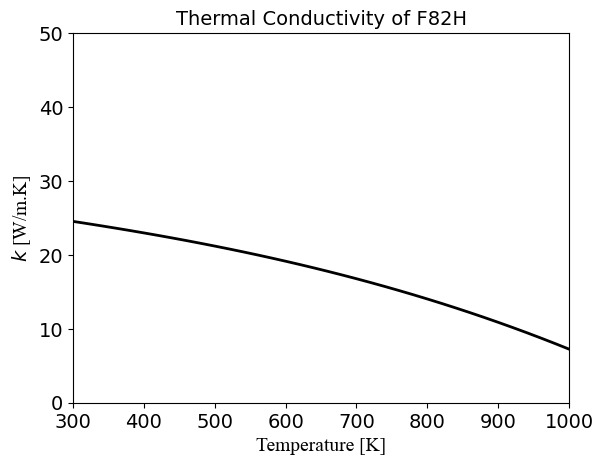

In [15]:
# Calculate thermal conductivity for each temperature value
k = np.array([F82H_k(temp) for temp in T])

# Plot the data
fig = plt.figure('W Thermal Conductivity')
plt.plot(T, k, 'k', linewidth=2)
plt.xlabel('Temperature [K]', fontsize=14, fontname='Times New Roman')
plt.ylabel(r'$k$ [W/m.K]', fontsize=14, fontname='Times New Roman')
plt.xlim([300, 1000])
plt.ylim([0, 50])
plt.title('Thermal Conductivity of F82H', fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize=14)

plt.show()

In [16]:
inital_row = 1
title = "Thermal Conductivity of F82H"
reference = ["A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628."]

OutputExcel(sheetname, title, reference, inital_row, [], [fig])

finished


### "Eurofer MPH 2016"

In [17]:
temperature = [20, 50, 100, 200, 300, 400, 500, 600]
thermal_conductivity = [28.08, 28.86, 29.78, 30.38, 30.01, 29.47, 29.58, 31.12]

df_conductivity = pd.DataFrame({
    "Temperature (°C)": temperature,
    "Thermal Conductivity (W/m*K)": thermal_conductivity
})

In [18]:
def fit_func(t):
    t = t + 273.15
    ans = t*(0.190706-4.3053e-4*t+3.817e-7*t**2-1.158e-10*t**3)
    return ans

In [19]:
T = range(0, 601, 20)
k = np.array([fit_func(temp) for temp in T])

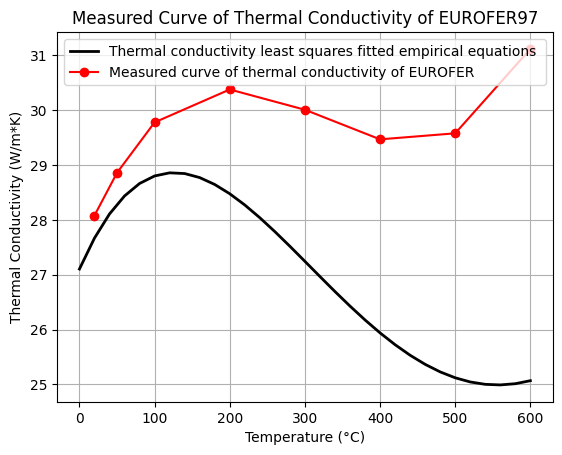

In [20]:
fig2 = plt.figure()
plt.plot(T, k, 'k', linewidth=2, label="Thermal conductivity least squares fitted empirical equations ")
plt.plot(df_conductivity["Temperature (°C)"], df_conductivity["Thermal Conductivity (W/m*K)"], marker='o', linestyle='-', color='r', label = "Measured curve of thermal conductivity of EUROFER")
plt.title('Measured Curve of Thermal Conductivity of EUROFER97')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal Conductivity (W/m*K)')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
inital_row = 30
title = "Thermal Conductivity of Eurofer"
reference = [
    "ASTM-C-108 Standard Symbols for Heat Transmission",
    "ASTM E-1142 Standard Terminology Relating to Thermophysical Properties",
    "F. Tavassoli: “Comparison of 316L(N) -IG and Eurofer for Early DEMO”. EFDA-WP13-MAT-02-01",
    "K. Mergia, N. Boukos: 'Structural, thermal, electrical and magnetic properties of Eurofer97 steel', J. Nucl. Mater. 373 (2008) 1-8"
]

OutputExcel(sheetname, title, reference, inital_row, [df_conductivity], [fig2])

finished


### "F. Tavassoli, DEMO Interim structural design criteria. Ref. N, T.-DMN/DIR 2002."

In [22]:
data_conductivity = {
    'EUROFER97 Temp (K)': [295.8333333, 322.6190476, 372.6190476, 473.2142857, 572.6190476, 672.6190476, 772.6190476, 872.6190476],
    'EUROFER97 Thermal Conductivity (W/m-K)': [28.33009709, 28.93203883, 29.1941476, 30.66990291, 30.1941476, 29.33009709, 29.44660194, 31.17475728],
    'F82H Temp (K)': [292.8571429, 372.6190476, 473.2142857, 572.6190476, 673.2142857, 773.2142857, 872.6190476, 973.2142857, 1073.214286],
    'F82H Thermal Conductivity (W/m-K)': [31.32038835, 32.53398058, 32.9223301, 33.4368932, 33.02912621, 32.72815534, 32.32038835, 31.9223301, 29.22330097]
}

In [23]:
df = pd.DataFrame.from_dict(data_conductivity, orient='index').transpose()

In [24]:
coeffs_eurofer97_cond = np.polyfit(data_conductivity['EUROFER97 Temp (K)'], data_conductivity['EUROFER97 Thermal Conductivity (W/m-K)'], 3)
poly_eurofer97_cond = np.poly1d(coeffs_eurofer97_cond)
coeffs_f82h_cond = np.polyfit(data_conductivity['F82H Temp (K)'], data_conductivity['F82H Thermal Conductivity (W/m-K)'], 4)
poly_f82h_cond = np.poly1d(coeffs_f82h_cond)


temp_eurofer97_cond = np.linspace(min(data_conductivity['EUROFER97 Temp (K)']), max(data_conductivity['EUROFER97 Temp (K)']), 500)
temp_f82h_cond = np.linspace(min(data_conductivity['F82H Temp (K)']), max(data_conductivity['F82H Temp (K)']), 500)

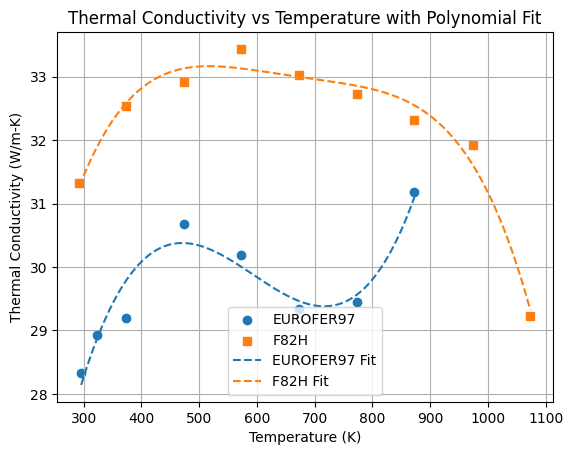

In [25]:
fig3 = plt.figure()

plt.scatter(data_conductivity['EUROFER97 Temp (K)'], data_conductivity['EUROFER97 Thermal Conductivity (W/m-K)'], label='EUROFER97', marker='o')
plt.scatter(data_conductivity['F82H Temp (K)'], data_conductivity['F82H Thermal Conductivity (W/m-K)'], label='F82H', marker='s')
plt.plot(temp_eurofer97_cond, poly_eurofer97_cond(temp_eurofer97_cond), label='EUROFER97 Fit', linestyle='--')
plt.plot(temp_f82h_cond, poly_f82h_cond(temp_f82h_cond), label='F82H Fit', linestyle='--')

plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/m-K)')
plt.title('Thermal Conductivity vs Temperature with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
inital_row = 72
title = "Thermal Conductivity of Eurofer and F82H"
reference = [
    "F. Tavassoli, DEMO Interim structural design criteria. Ref. N, T.-DMN/DIR 2002.",
    "Thermal conductivity versus temperature. Circles: Eurofer 97 using Eqs. (1), (4) and (6). Squares: Eurofer 97 from the experimental data points of diffusivity and specific heat (Figs. 3 and 4) and using Eq. (1). Open triangles: F82H according to Ref. [1]. The continuous and dotted lines are the least squares fitted equations (10) and (11). Insert: open circles experimental thermal resistivity values of Eurofer 97, continuous line the least squares fitted equation (9)."
]

OutputExcel(sheetname, title, reference, inital_row, [df_conductivity], [fig2])

finished


### "Progress in development of China Low Activation Martensitic steel for fusion application"

In [27]:
data = {
    "Temperature (°C)": [25, 100, 200, 300, 400, 500, 600],
    "Thermal conductivity (W/(m K))": [24.5, 26.5, 27.0, 27.9, 28.1, 28.4, 28.3]
}
df = pd.DataFrame(data)

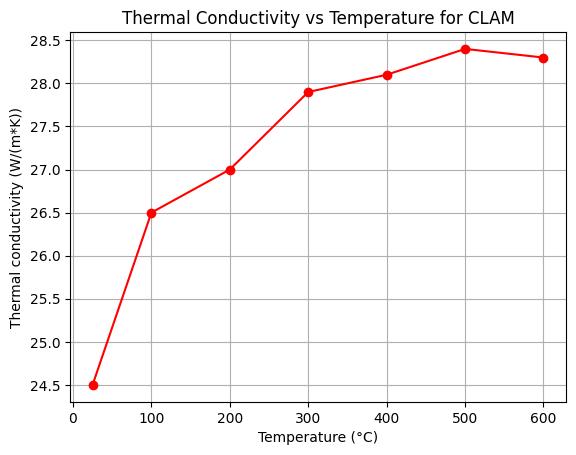

In [28]:
fig4 = plt.figure()
plt.plot(df["Temperature (°C)"], df["Thermal conductivity (W/(m K))"], marker='o', linestyle='-', color='r')
plt.title('Thermal Conductivity vs Temperature for CLAM')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal conductivity (W/(m*K))')
plt.grid(True)

plt.show()

In [29]:
inital_row = 113
title = "Thermal conductivity of CLAM (Chinese low activation martensitic steel)"
reference = [
    "Progress in development of China Low Activation Martensitic steel for fusion application Q. Huang",
    "Q. Huang, Research on China Low Activation Martensitic Steel for Fusion Application, PhD thesis, Chinese Academy of Sciences (in Chinese), 2006"
]

OutputExcel(sheetname, title, reference, inital_row, [df], [fig4])

finished


### "Research and development on the China low activation martensitic steel (CLAM) Jinnan Yu "

In [30]:
data = {
    "Temperature (°C)": [25, 100, 200, 300, 400, 500, 600],
    "Thermal conductivity (J/s cm °C)": [0.265, 0.256, 0.242, 0.229, 0.216, 0.202, 0.189]
}

df = pd.DataFrame(data)

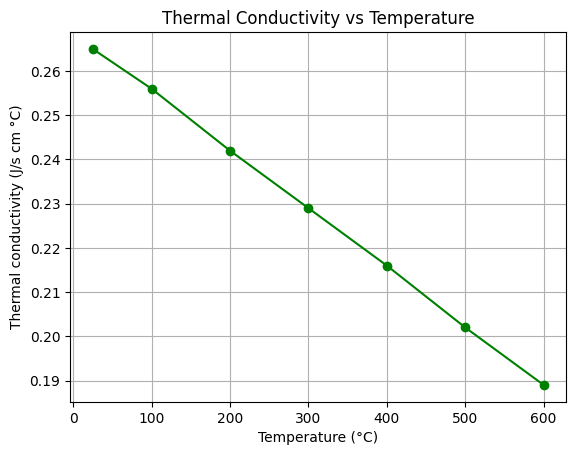

In [32]:
fig5 = plt.figure()
plt.plot(df["Temperature (°C)"], df["Thermal conductivity (J/s cm °C)"], marker='o', linestyle='-', color='g')
plt.title('Thermal Conductivity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal conductivity (J/s cm °C)')
plt.grid(True)

In [33]:
inital_row = 153
title = "Thermal conductivity of CLAM (Chinese low activation martensitic steel) 2"
reference = [
    "Research and development on the China low activation martensitic steel (CLAM) Jinnan Yu ",
]

OutputExcel(sheetname, title, reference, inital_row, [df], [fig5])

finished
